## California Housing Prices

### 1. DataSet 접근하여 살펴보기

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [2]:
data = pd.read_csv('./califoniaHousing/housing.csv')

##### 파일 정보

1. longitude: 경도

2. latitude: 위도

3. housingMedianAge: 주택나이 (중앙값)

4. totalRooms: 전체 방 수

5. totalBedrooms: 전체 침실 수

6. population:  인구

7. households: 세대

8. medianIncome: 소득 (중앙값)

9. medianHouseValue: 주택 가치 (중앙값

10. oceanProximity: w.r.t 바다/해상 위치

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# value_counts()를 이용해 컬럼의 Series의 unique value들을 count해본다.
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##### 1-1. 전처리 요건
데이터셋을 살펴 본 결과,

- total_bedrooms 의 결측값을 채워야한다.
- ocean_proximity의 카테고리형 데이터(Categorical Data)를 수치형 데이터(Numerical Data)로 변환시킬 필요가 있다.

##### 1-2. 상관계수 조사

In [12]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


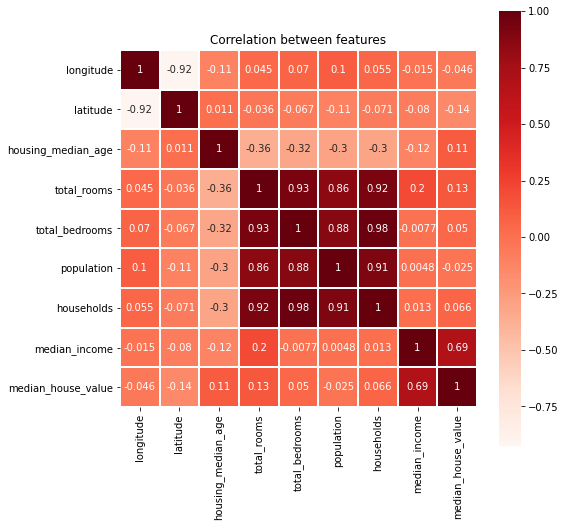

In [13]:
# 히트맵
# 'total_rooms', 'households', 'total_bedrooms', 'population' 간의 높은 상관관계
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), square=True, annot=True, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white')
plt.title('Correlation between features')
plt.show()

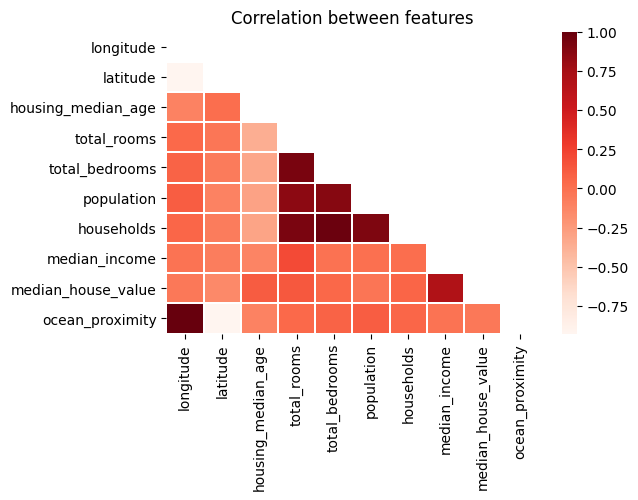

In [57]:
mask = np.triu(np.ones_like(data.corr(), dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation between features')
sns.heatmap(data.corr(), mask=mask, annot=False, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white', fmt = "0.2f")
plt.xticks(rotation=90) 
plt.yticks(rotation = 0)
plt.show()

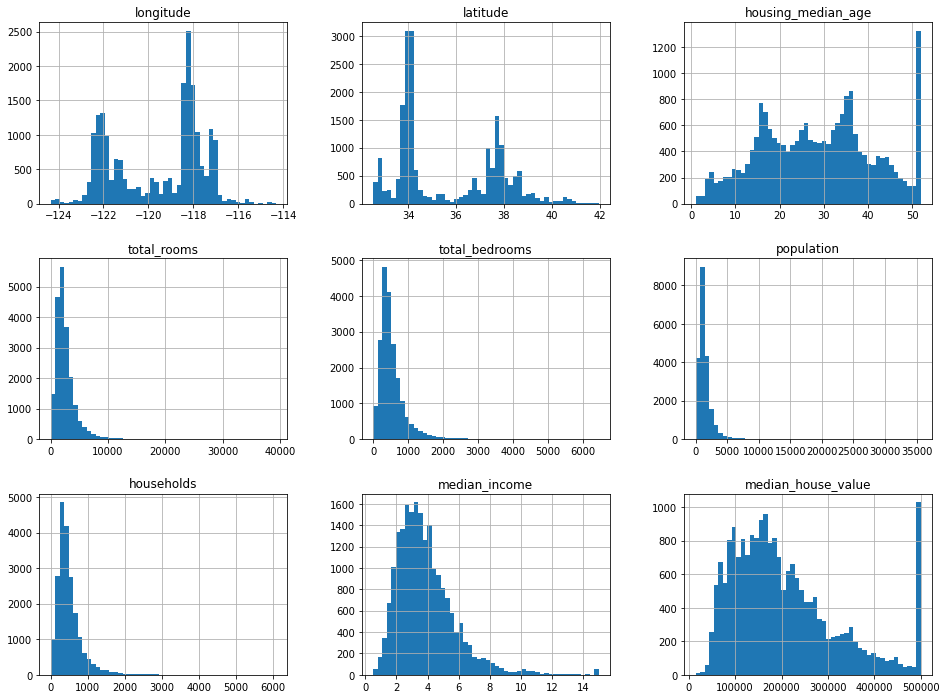

In [14]:
# 히스토그램
data.hist(bins=50, figsize=(16,12))
plt.show()

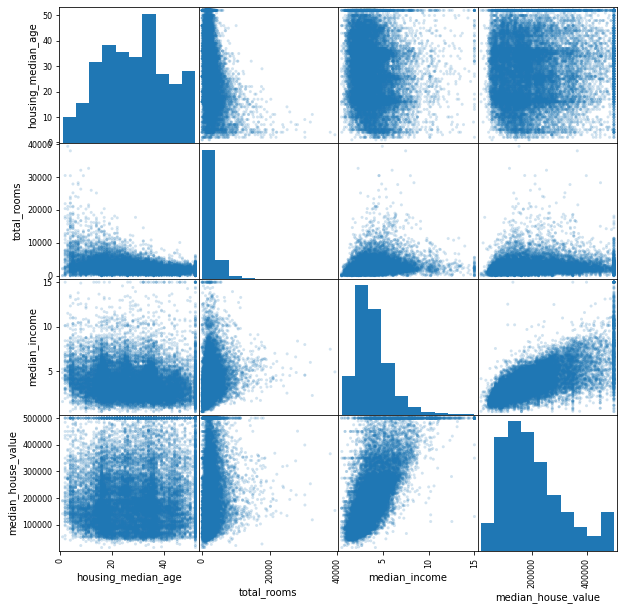

In [22]:
# 상관관계가 높아보이는 'housing_median_age', 'total_rooms' , 'median_income', 'median_house_value' 만을 이용하여 
# 산점도 그래프를 만들어본다.
# 'median_income' 과 'median_house_value' 가 가장 상관 관계가 있어보인다.
attributes = ['housing_median_age', 'total_rooms' , 'median_income', 'median_house_value']
fig = scatter_matrix(data[attributes], figsize=(10, 10), alpha=0.2)

### 2. Data 전처리

#### 2-1. 레이블 추가
데이터셋에 세 열을 추가 : 'rooms per household' / 'bedrooms per room' / 'population per household'

In [60]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

In [80]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,170,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,171,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,169,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,168,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,168,6.281853,0.172096,2.181467


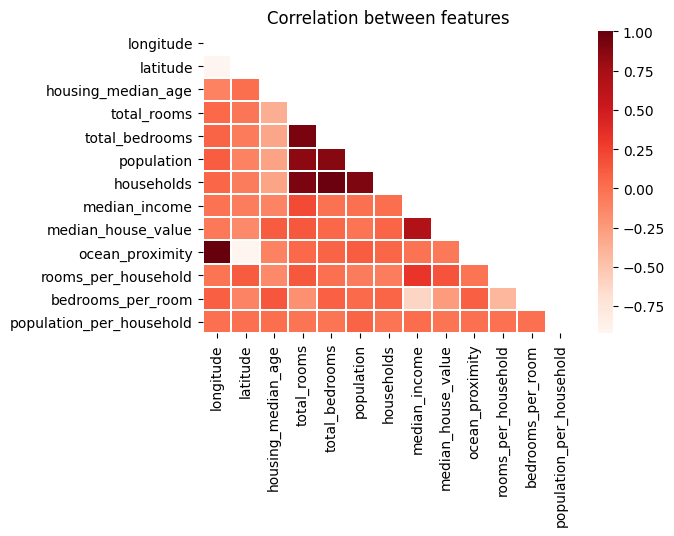

In [61]:
mask = np.triu(np.ones_like(data.corr(), dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation between features')
sns.heatmap(data.corr(), mask=mask, annot=False, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white', fmt = "0.2f")
plt.xticks(rotation=90) 
plt.yticks(rotation = 0)
plt.show()

#### 2-2. one-hot encoding
ocean_proximity의 카테고리형 데이터(Categorical Data)를 수치형 데이터(Numerical Data)로 변환시킬 필요가 있다.

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
# 수치형 데이터로 변환
data['ocean_proximity'] = LabelEncoder().fit_transform(data['ocean_proximity'])

In [81]:
# 더미로 만든 가변수 변환
df = pd.get_dummies(data=data, columns=['ocean_proximity'])

#### 2-3. 결측치처리
'total_bedrooms' 의 결측값(null)을 채워야한다.<br>
imputer를 사용해 결측값을 각각의 행의 평균값으로 치환해준다.

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [64]:
imputer = SimpleImputer(strategy='median')

In [67]:
imputer.fit(data[['total_bedrooms']])

SimpleImputer(strategy='median')

In [69]:
result = imputer.transform(data[['total_bedrooms']])

In [71]:
# update
data[['total_bedrooms']] = result
data[['total_bedrooms']].isnull().sum()

total_bedrooms    0
dtype: int64

'ocean_proximity'의 결측값 처리

#### 2-4. dataset Normalize (정규화)
기계학습의 성능을 높이기 위해 데이터셋을 정규화해야한다. <br>
select => StandardScaler / 	MinMaxScaler / MaxAbsScaler / RobustScaler

그 전에 'median_house_value' 행을 분리해 레이블로 사용한다.

In [ ]:
housing_labels = data['median_houser_value'].copy()
data_tr.drop('median_houser_value', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler

In [ ]:
# MinMaxScaler

In [ ]:
# MaxAbsScaler

In [ ]:
# RobustScaler

#### 2-5. 학습용, 테스트용 데이터 분리

In [83]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, housing_labels, test_size=0.2, random_state=123)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
x.train.head()

In [ ]:
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

In [ ]:
x.train.head()

### 3. 모델학습